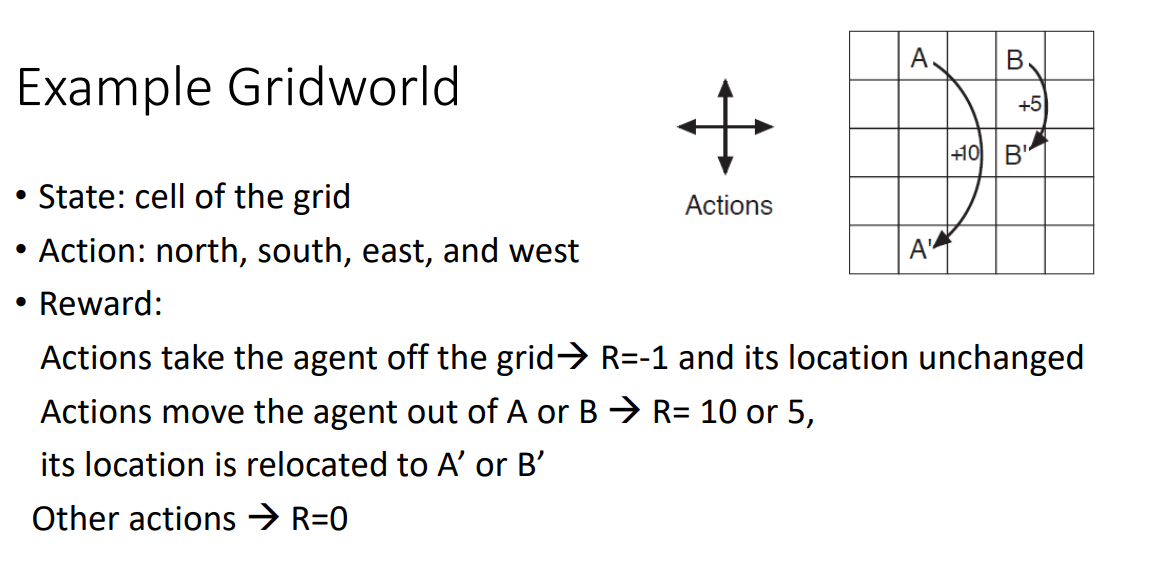

In [9]:

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.table import Table

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9


# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25

def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val, 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)


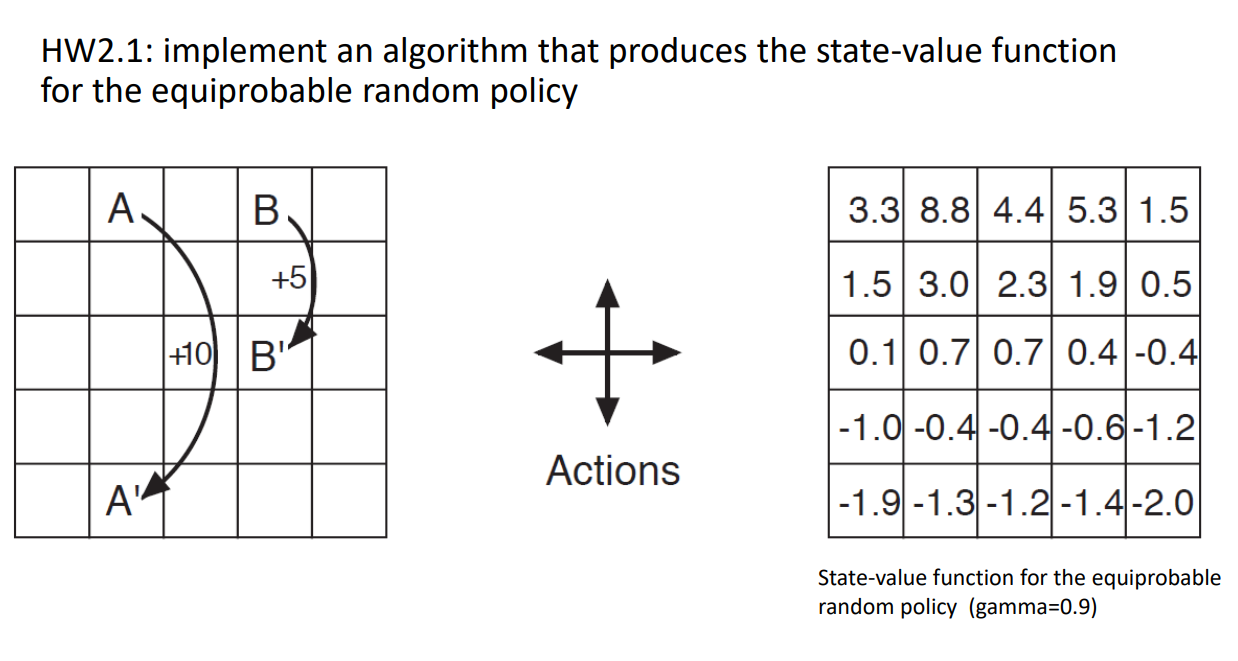

In [10]:
def figure_2_1():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteratiing until convergence
        new_value = np.zeros(value.shape)
        
        # bellman equation
        for row in range(WORLD_SIZE):
            for col in range(WORLD_SIZE):
                for action in ACTIONS:
                    next_state, reward = step([row, col], action)
                    next_update_0, next_update_1 = next_state[0], next_state[1]
                    new_value[row, col] += ACTION_PROB * (reward + DISCOUNT * value[next_update_0, next_update_1])
                    
        if np.sum(np.abs(value - new_value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            # from google.colab import files #google.colab only
            plt.savefig("2_1.png")
            # files.download("2_1.png") #google.colab only
            plt.close()
            break
        value = new_value

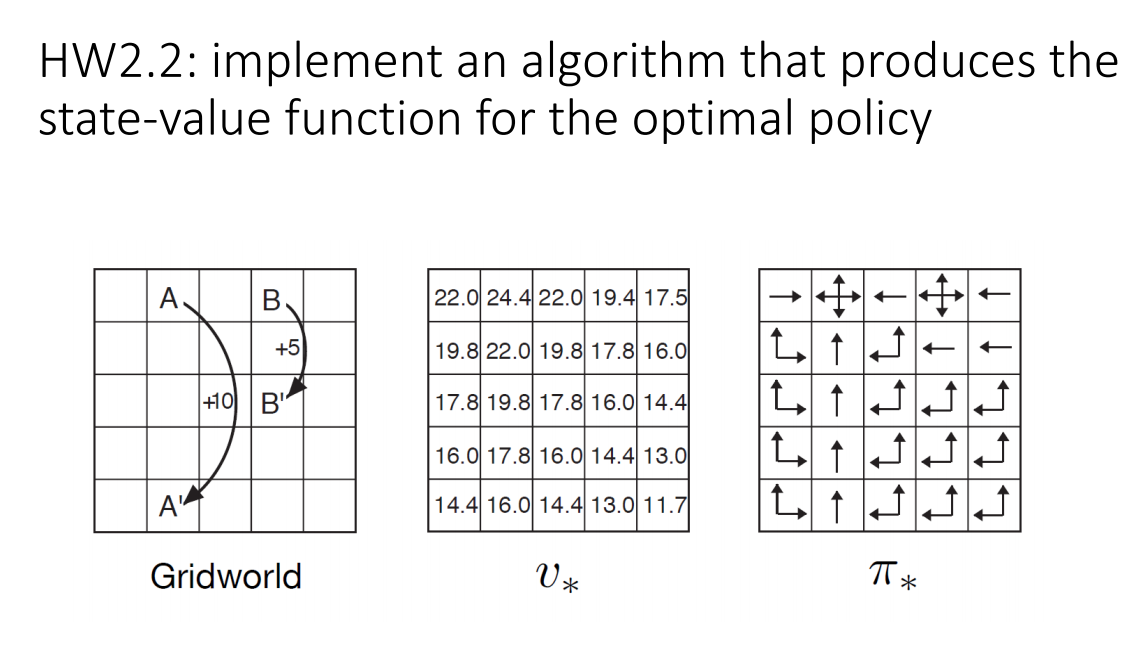

In [11]:
def figure_2_2():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keeping iteratiing until convergence
        new_value = np.zeros(value.shape)
        # optimal value function 
        for row in range(WORLD_SIZE):
            for col in range(WORLD_SIZE):
                opt_values = []
                for action in ACTIONS:
                    next_state, reward = step([row, col], action)
                    next_update_0, next_update_1 = next_state[0], next_state[1]
                    opt_values.append(reward + DISCOUNT * value[next_update_0, next_update_1])
                new_value[row, col] = max(opt_values)
        
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            # from google.colab import files #google.colab only
            plt.savefig("2_2.png")
            # files.download("2_2.png") #google.colab only
            plt.close()
            break
        value = new_value

In [12]:
def figure_2_1_custom_g(gamma):
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keeping iteratiing until convergence
        new_value = np.zeros(value.shape)
        for row in range(WORLD_SIZE):
            for col in range(WORLD_SIZE):
                for action in ACTIONS:
                    next_state, reward = step([row, col], action)
                    next_update_0, next_update_1 = next_state[0], next_state[1]
                    new_value[row, col] += ACTION_PROB * (reward + gamma * value[next_update_0, next_update_1])
        
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            # from google.colab import files #google.colab only
            if gamma == 0.1:
                plt.savefig("2_1_1.png")
            else:
                plt.savefig("2_1_2.png")   
            # files.download("2_2.png") #google.colab only
            plt.close()
            break
        value = new_value

In [13]:
def figure_2_2_custom_g(gamma):
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keeping iteratiing until convergence
        new_value = np.zeros(value.shape)
        # optimal value function 
        for row in range(WORLD_SIZE):
            for col in range(WORLD_SIZE):
                opt_values = []
                for action in ACTIONS:
                    next_state, reward = step([row, col], action)
                    next_update_0, next_update_1 = next_state[0], next_state[1]
                    opt_values.append(reward + gamma * value[next_update_0, next_update_1])
                new_value[row, col] = max(opt_values)
        
        if np.sum(np.abs(new_value - value)) < 1e-4:
            draw_image(np.round(new_value, decimals=2))
            # from google.colab import files #google.colab only
            if gamma == 0.1:
                plt.savefig("2_2_1.png")
            else:
                plt.savefig("2_2_2.png")
            # files.download("2_2.png") #google.colab only
            plt.close()
            break
        value = new_value

In [14]:

if __name__ == '__main__':
    figure_2_1()
    figure_2_2()
    figure_2_1_custom_g(0.1)
    figure_2_1_custom_g(0.5)
    figure_2_2_custom_g(0.1)
    figure_2_2_custom_g(0.5)
